<a href="https://colab.research.google.com/github/engcivilgabriel/Projects/blob/master/Gas_Prices_in_Brazil.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**ANÁLISE GEOESPACIAL DOS PREÇOS DE COMBUSTÍVEL NO BRASIL**

<center><img alt="gas" width="70%" src="https://portallubes.com.br/wp-content/uploads/2020/07/combust%C3%ADveis.jpg
"></center>

Se você for hoje a um posto de combustível para abastecer seu veículo, pode ficar perdido com a quantidade de tipos de gasolina, etanol e diesel disponíveis. São tantos nomes e preços diferentes nos estabelecimentos que realmente acabam confundindo a  cabeça de qualquer um.

Ao mesmo tempo, é interessante perceber que já não há quaisquer veículos leves no Brasil rodando apenas através de gasolina. Desde 1976, o governo tornou obrigatória a mistura de etanol anidro à gasolina, oscilando entre 10% a 22%, e que requer apenas um pequeno ajuste em motores a gasolina normais. Contudo, desde 1 de julho de 2007, a mistura obrigatória é de 25% de etanol anidro e 75% de gasolina (E25). O limite inferior foi reduzida para 18% em abril de 2011, devido a recorrentes escassez de oferta de etanol e os preços elevados que ocorrem entre as épocas de colheita. (`Fonte: Wikipédia, a enciclopédia livre.`)

Assim, visando estudar este assunto, **este projeto objetiva analisar a variação do preço desses combustiveis distribuidos nacionalmente ao longo dos anos de 2004 a 2019 entre as Unidades Federativas brasileiras**.





## O Projeto

> O objetivo deste projeto é **analisar e buscar insights sobre a variação dos preços de combustíveis entre os anos de 2004 e 2019 no Brasil, confeccionando uma análise geoespacial baseada nos dados apresentados**, bem como buscar meios de melhor visualizar estes dados.

Utilizando dados disponibilizados no [Kaggle]('https://kaggle.com/'), construiremos um modelo que pode ajudar consumidores a tomarem melhores decisões de consumo e criar consciência monetária, temporal e espacial dos combustíveis no Brasil.

###Importando Bibliotecas

Vamos começar importando as bibliotecas necessárias para manusear as informações do dataset.

In [1]:
#@title
!pip install geopandas

     |████████████████████████████████| 972kB 5.2MB/s 
     |████████████████████████████████| 6.5MB 13.3MB/s 
     |████████████████████████████████| 14.8MB 305kB/s 


In [2]:
# Importando bibliotecas necessárias
from IPython.display import display, HTML # Funções de exibição
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_palette("colorblind") 
sns.set_style("darkgrid")

# Definir as opções de exibição do Pandas
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# Importar bibliotecas geoespaciais
import geopandas as gpd
from shapely.geometry import Point
from mpl_toolkits.axes_grid1 import make_axes_locatable

###Importando Dataset

Com as bibliotecas devidamente declaradas e prontas para o uso, vamos agora importar nosso dataset e fazer uma pré-visualização das informações presentes na sua estrutura.

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/engcivilgabriel/Analysis-of-public-data/master/CSV/Gas%20Prices%20in%20Brazil%202004-2019.tsv", sep='\t',parse_dates=True)
df.head()

,Unnamed: 0,DATA INICIAL,DATA FINAL,REGIÃO,ESTADO,PRODUTO,NÚMERO DE POSTOS PESQUISADOS,UNIDADE DE MEDIDA,PREÇO MÉDIO REVENDA,DESVIO PADRÃO REVENDA,PREÇO MÍNIMO REVENDA,PREÇO MÁXIMO REVENDA,MARGEM MÉDIA REVENDA,COEF DE VARIAÇÃO REVENDA,PREÇO MÉDIO DISTRIBUIÇÃO,DESVIO PADRÃO DISTRIBUIÇÃO,PREÇO MÍNIMO DISTRIBUIÇÃO,PREÇO MÁXIMO DISTRIBUIÇÃO,COEF DE VARIAÇÃO DISTRIBUIÇÃO,MÊS,ANO
0,0,2004-05-09,2004-05-15,CENTRO OESTE,DISTRITO FEDERAL,ETANOL HIDRATADO,127,R$/l,1.288,0.016,1.19,1.350,0.463,0.012,0.825,0.11,0.4201,0.9666,0.133,5,2004
1,1,2004-05-09,2004-05-15,CENTRO OESTE,GOIAS,ETANOL HIDRATADO,387,R$/l,1.162,0.114,0.89,1.449,0.399,0.098,0.763,0.088,0.5013,1.05,0.115,5,2004
2,2,2004-05-09,2004-05-15,CENTRO OESTE,MATO GROSSO,ETANOL HIDRATADO,192,R$/l,1.389,0.097,1.18,1.760,0.419,0.070,0.97,0.095,0.5614,1.161,0.098,5,2004
3,3,2004-05-09,2004-05-15,CENTRO OESTE,MATO GROSSO DO SUL,ETANOL HIDRATADO,162,R$/l,1.262,0.070,1.09,1.509,0.432,0.055,0.83,0.119,0.5991,1.22242,0.143,5,2004
4,4,2004-05-09,2004-05-15,NORDESTE,ALAGOAS,ETANOL HIDRATADO,103,R$/l,1.181,0.078,1.05,1.400,0.24,0.066,0.941,0.077,0.7441,1.0317,0.082,5,2004


O presente Dataset foi confeccionado por Matheus Eduardo Freitag com informações disponibilizadas no site da Agência Nacional de Petróleo, Gás Natural e Biocombustíveis. A ANP fornece um arquivo em formato .xls com todas as datas históricas apresentadas neste conjunto de dados. O arquivo para download pode ser localizado em: https://www.kaggle.com/matheusfreitag/gas-prices-in-brazil

##Limpeza dos Dados

Com a pré-visualização do dataset, vamos agora entender suas características. Para isso, analisaremos as informações pertinentes às suas variáveis:

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106823 entries, 0 to 106822
Data columns (total 21 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Unnamed: 0                     106823 non-null  int64  
 1   DATA INICIAL                   106823 non-null  object 
 2   DATA FINAL                     106823 non-null  object 
 3   REGIÃO                         106823 non-null  object 
 4   ESTADO                         106823 non-null  object 
 5   PRODUTO                        106823 non-null  object 
 6   NÚMERO DE POSTOS PESQUISADOS   106823 non-null  int64  
 7   UNIDADE DE MEDIDA              106823 non-null  object 
 8   PREÇO MÉDIO REVENDA            106823 non-null  float64
 9   DESVIO PADRÃO REVENDA          106823 non-null  float64
 10  PREÇO MÍNIMO REVENDA           106823 non-null  float64
 11  PREÇO MÁXIMO REVENDA           106823 non-null  float64
 12  MARGEM MÉDIA REVENDA          

Vemos que **o dataset apresenta 106.823 linhas e 21 colunas**, bem como não apresenta ausência de informações para nenhuma variável, o que é o ideal.

###Limpeza Preliminar

Através de uma olhada nos dados brutos fica evidente que, para uma melhor manipulação:

*   Os nomes das colunas deverão ser limpos e padronizados;
*   As datas devem ser convertidas em objetos Datetime; e,
*   As colunas desnecessárias devem ser removidas.

In [5]:
# Substituindo o espaço em branco por sublinhado
df.columns = df.columns.str.replace(" ", "_")
df.columns = df.columns.str.replace("'", "")
df.columns = df.columns.str.replace("DISTRIBUIÇÃO", "DIST")

# Convertendo colunas datetime em objetos datetime e renomeando
df["DATA_INICIAL"] = pd.to_datetime(df["DATA_INICIAL"])

Em continuação à limpeza, vamos agora:

*   Corrigir caracteres de string inadequados nas colunas que devem ser numéricas;
*   Renomear categorias UNIDADE_DE_MEDIDA; e,
*   Converter tipos de objeto em tipo de categoria.

In [6]:
# Correção de dtypes
float_columns = ['MARGEM_MÉDIA_REVENDA', 'PREÇO_MÉDIO_DIST', 'DESVIO_PADRÃO_DIST',
       'PREÇO_MÍNIMO_DIST', 'PREÇO_MÁXIMO_DIST',
       "COEF_DE_VARIAÇÃO_DIST"]

# Substituindo "-" por 0 para converter para float
for column in float_columns:
  df[column] = df[column].replace("-", "0")

# Preenchendo nulos e convertendo em float
df[float_columns] = df[float_columns].fillna(0).astype(float)
assert df[float_columns].dtypes.all() == np.float64

# Renomeando categorias UNIDADE_DE_MEDIDA
units = {"R$/l":"litros", "R$/13Kg":"13kg", "R$/m3":"m3"}
df["UNIDADE_DE_MEDIDA"] = df["UNIDADE_DE_MEDIDA"].map(units)

# Convertendo objetos para categoria
object_cols = df.select_dtypes(include='object').columns
df[object_cols] = df[object_cols].astype('category')

###Engenharia de Recursos

Vamos agora criar novas colunas:

*   GRUPO_PREÇO - separando o GLP dos outros combustíveis para facilitar a visualização;
*   PREÇO_NORM_MÉDIO - Normalizado PREÇO_MÉDIA_REVENDA por produto de combustível; e,
*   ANO_MÊS - para gráficos de séries temporais

In [7]:
# Criando grupos de preços: Grupo 1 são combustíveis líquidos mais Gás Natural, Grupo 2 é GLP
df['GRUPO_PREÇO'] = df.UNIDADE_DE_MEDIDA.map({'litros':int(1), 'm3':int(1), '13kg':int(2)})

# Normalizando o preço médio para cada grupo de combustível
normalizer = lambda x: (x - x.min()) / (x.max() - x.min())

# Normalizando preços para GRUPO_PREÇO_1: todos os combustíveis, exceto GLP
df["PREÇO_NORM_MÉDIO_GRUPO_PREÇO_1"] = df[df.GRUPO_PREÇO==1].groupby("PRODUTO")["PREÇO_MÉDIO_REVENDA"].transform(normalizer)

# Normalizando preços para Price_Group_2: GLP
df["PREÇO_NORM_MÉDIO_GRUPO_PREÇO_2"] = df[df.GRUPO_PREÇO==2].groupby("PRODUTO")["PREÇO_MÉDIO_REVENDA"].transform(normalizer)

# Combinando as colunas GRUPO_PREÇO em uma coluna
df["PREÇO_NORM_MÉDIO"] = df["PREÇO_NORM_MÉDIO_GRUPO_PREÇO_1"].fillna(df["PREÇO_NORM_MÉDIO_GRUPO_PREÇO_2"])
df.drop(["PREÇO_NORM_MÉDIO_GRUPO_PREÇO_1", "PREÇO_NORM_MÉDIO_GRUPO_PREÇO_2"], axis=1, inplace=True)

# Criando coluna ANO_MÊS para gráficos de série temporal
ANO_MÊS = df.ANO.astype(str) + "-" + df.MÊS.astype(str)
df["ANO_MÊS"] = pd.to_datetime(ANO_MÊS)

Vamos verificar agora se os valores foram normalizados corretamente:

In [8]:
# Verificando os valores máx. / Mín. de cada grupo de produtos para garantir que foram normalizados corretamente
produtos = df.PRODUTO.unique().tolist()

for produto in range(len(produtos)):
    mins = df[df.PRODUTO==produtos[produto]]["PREÇO_NORM_MÉDIO"].min()
    maxs = df[df.PRODUTO==produtos[produto]]["PREÇO_NORM_MÉDIO"].max()
    
    print(produtos[produto])
    print(mins, maxs)

ETANOL HIDRATADO
0.0 1.0
GASOLINA COMUM
0.0 1.0
GLP
0.0 1.0
GNV
0.0 1.0
ÓLEO DIESEL
0.0 1.0
ÓLEO DIESEL S10
0.0 1.0


###Eliminando Colunas Desnecessárias

Algumas colunas serão desnecessárias para a análise proposta neste momento, por este motivo entende-se razoável elimina-las agora.

In [9]:
df.drop(['Unnamed:_0', 'DATA_FINAL'], axis = 1, inplace=True)

Pronto! Agora estamos a um passo da nossa análise exploratória.

##Análise Exploratória dos Dados

Após o processo de limpeza e preparação dos dados, entende-se que as principais questões que podem ser colocadas para esta análise serão respondidas, basicamente, pela variável PREÇO_MÉDIA_REVENDA. As outras variáveis numéricas podem ser excluídas, com exceção de PREÇO_MÉDIO_DIST, devido a algum comportamento interessante que examinaremos. Portanto, as colunas incluídas nesta análise serão:

* DATA_INICIAL
* REGIÃO
* ESTADO
* PRODUTO
* NÚMERO_DE_POSTOS_PESQUISADOS
* UNIDADE_DE_MEDIDA
* PREÇO_MÉDIO_REVENDA
* PREÇO_MÉDIO_DIST
* MÊS
* ANO
* GRUPO_PREÇO

In [10]:
# Eliminar colunas desnecessárias
df.drop(['DESVIO_PADRÃO_REVENDA', 
         'PREÇO_MÍNIMO_REVENDA', 'PREÇO_MÁXIMO_REVENDA', 'MARGEM_MÉDIA_REVENDA', 
         'COEF_DE_VARIAÇÃO_REVENDA', 
         'DESVIO_PADRÃO_DIST', 'PREÇO_MÍNIMO_DIST', 'PREÇO_MÁXIMO_DIST', 
         'COEF_DE_VARIAÇÃO_DIST'], axis = 1, inplace=True)

###Análise de Recursos

De posse do Dataset com as informações relevantes para esta análise, vamos agora visualizar cada uma das variáveis.

####Variáveis Categóricas

As variáveis categóricas são:

* REGIÃO
* ESTADO
* PRODUTO
* UNIDADE_DE_MEDIDA
* GRUPO_PREÇO


#####REGIÃO

In [11]:
# Mostrar nomes e porcentagem de observações para cada região
df.REGIÃO.value_counts(normalize=True)

NORDESTE        0.345141
NORTE           0.231242
SUDESTE         0.159582
CENTRO OESTE    0.144435
SUL             0.119600
Name: REGIÃO, dtype: float64

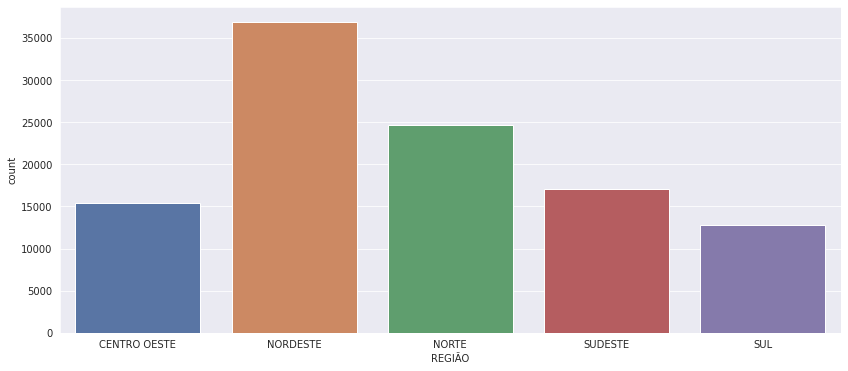

In [12]:
# Gráfico de contagem de observações por região
fig, ax = plt.subplots(figsize=(14,6))
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="REGIÃO", data=df)

#####ESTADO

In [13]:
# Examinando o número de observações por Estado
df['ESTADO'].value_counts()

BAHIA                  4263
SAO PAULO              4263
PARAIBA                4263
CEARA                  4263
RIO DE JANEIRO         4263
RIO GRANDE DO SUL      4263
RIO GRANDE DO NORTE    4262
PERNAMBUCO             4262
SANTA CATARINA         4262
MINAS GERAIS           4261
ESPIRITO SANTO         4260
SERGIPE                4259
PARANA                 4251
ALAGOAS                4250
MATO GROSSO DO SUL     4246
MATO GROSSO            4037
AMAZONAS               3889
GOIAS                  3663
PIAUI                  3548
MARANHAO               3499
PARA                   3497
TOCANTINS              3483
DISTRITO FEDERAL       3483
ACRE                   3480
RONDONIA               3479
RORAIMA                3471
AMAPA                  3403
Name: ESTADO, dtype: int64

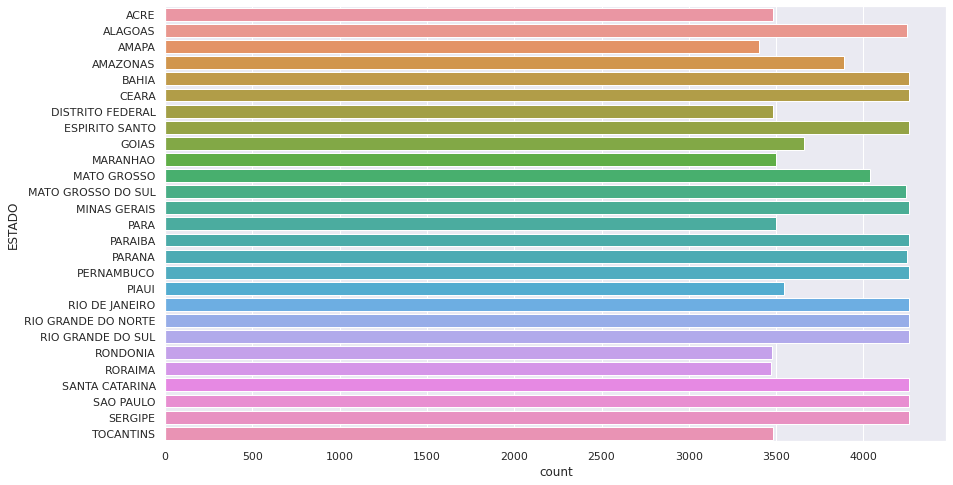

In [14]:
# Contagem de observações por Estado
fig, ax = plt.subplots(figsize=(14,8))
sns.set_theme(style="darkgrid")
ax = sns.countplot(y="ESTADO", data=df)

#####PRODUTO

In [15]:
# Exibir porcentagens de produtos
df['PRODUTO'].value_counts(normalize=True)

ÓLEO DIESEL         0.198403
GASOLINA COMUM      0.198403
GLP                 0.198328
ETANOL HIDRATADO    0.197542
GNV                 0.122015
ÓLEO DIESEL S10     0.085309
Name: PRODUTO, dtype: float64

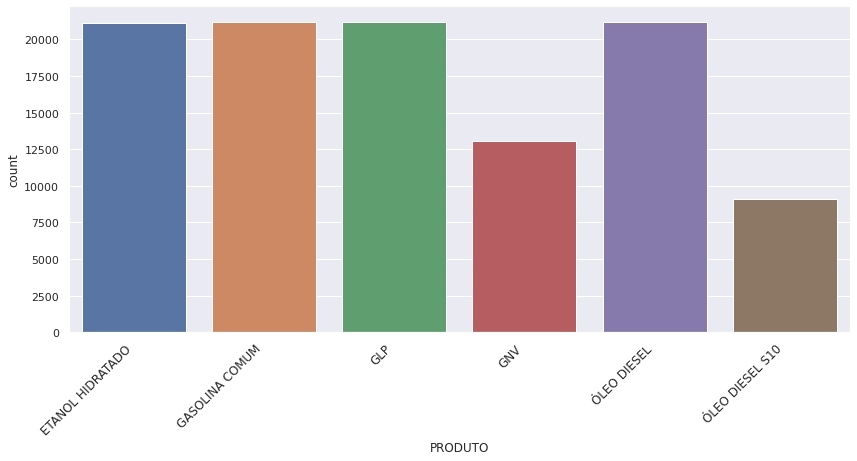

In [16]:
# Gráfico de contagem de observações por região
fig, ax = plt.subplots(figsize=(14,6))
plt.xticks(rotation=45, fontsize=12, ha='right')
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="PRODUTO", data=df)

Observar estas distribuições leva às seguintes questões:

1.   **Qual é a distribuição de produtos por região?**
2.   **Qual é a distribuição de produtos por Estado?**

Vamos observar esta questões logo a seguir:



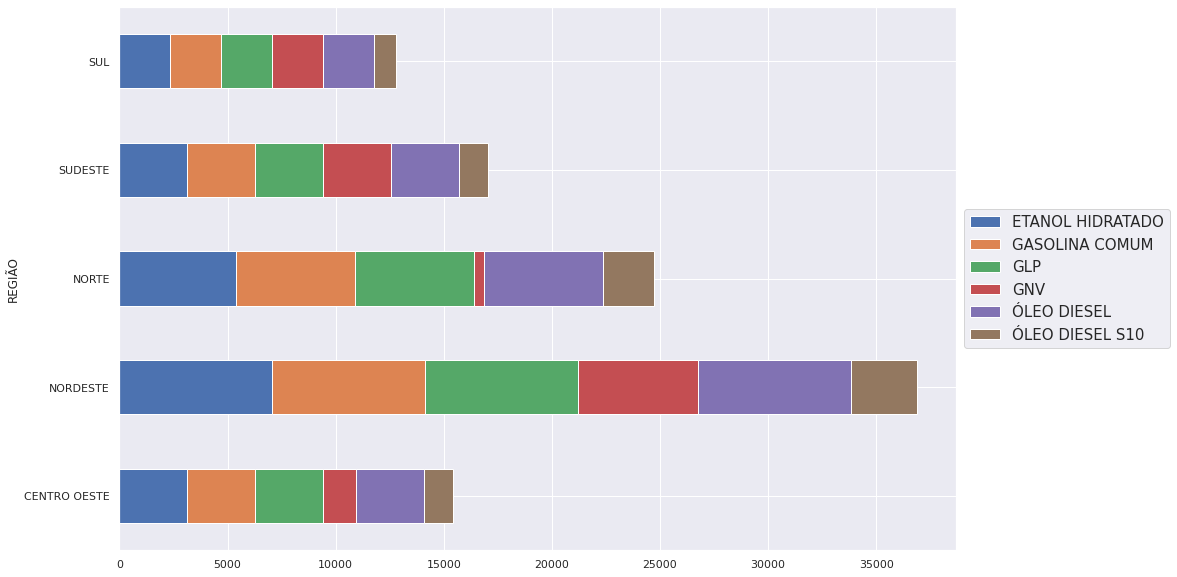

In [17]:
# Grupo por Região
produto_por_regiao = df.groupby("REGIÃO")["PRODUTO"].value_counts().to_frame("Count").reset_index()
produto_por_regiao = produto_por_regiao.pivot("REGIÃO", "PRODUTO")
fig, ax = plt.subplots(figsize=(15,10))
produto_por_regiao.plot(kind="barh", stacked=True, ax=ax)
ax.legend(sorted(df.PRODUTO.unique().tolist()), loc='center left', bbox_to_anchor=(1, 0.5),prop={'size': 15});

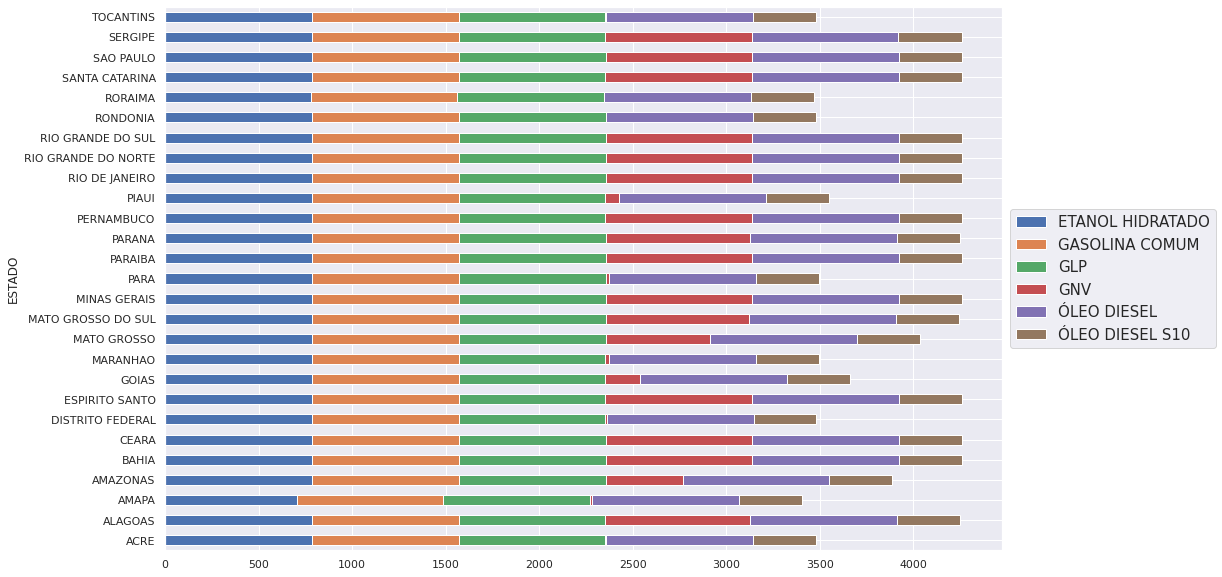

In [18]:
# Grupo por Estado
produto_por_estado = df.groupby("ESTADO")["PRODUTO"].value_counts().to_frame("Count").reset_index()
produto_por_estado = produto_por_estado.pivot("ESTADO", "PRODUTO")
fig, ax = plt.subplots(figsize=(15,10))
produto_por_estado.plot(kind="barh", stacked=True, ax=ax)
ax.legend(sorted(df.PRODUTO.unique().tolist()), loc='center left', bbox_to_anchor=(1, 0.5),prop={'size': 15});

#####UNIDADE DE MEDIDA

In [19]:
# Exibir porcentagens de unidades de medida
df.UNIDADE_DE_MEDIDA.value_counts(normalize=True)

litros    0.679657
13kg      0.198328
m3        0.122015
Name: UNIDADE_DE_MEDIDA, dtype: float64

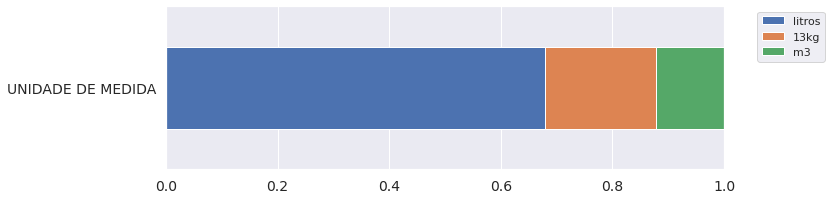

In [20]:
# Contagens de valor do gráfico
fig, ax = plt.subplots(1, 1, figsize=(10,3))
df.UNIDADE_DE_MEDIDA.value_counts(normalize=True).to_frame("UNIDADE DE MEDIDA").T.plot(kind="barh", stacked=True, ax=ax,
                                                    fontsize=14)
plt.legend(bbox_to_anchor=(1.05, 1))
plt.xlim(0, 1);

#####GRUPOS DE PREÇOS

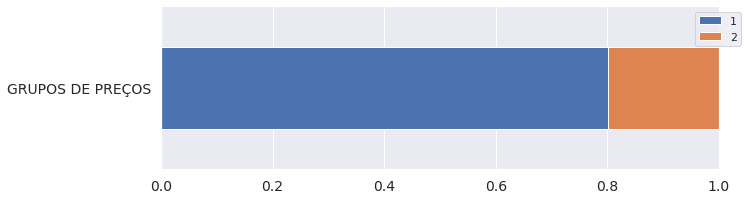

In [21]:
# Graph value counts

fig, ax = plt.subplots(1, 1, figsize=(10,3))

df.GRUPO_PREÇO.value_counts(normalize=True).to_frame("GRUPOS DE PREÇOS").T.plot(kind="barh", stacked=True, ax=ax,
                                                    fontsize=14)

plt.legend(bbox_to_anchor=(1.05, 1))
plt.xlim(0, 1);

####Variáveis Numéricas

As variáveis numéricas são:

*   DATA_INICIAL
*   NÚMERO_DE_POSTOS_PESQUISADOS
* PREÇO_MÉDIO_REVENDA
* PREÇO_MÉDIO_DIST
* MÊS
* ANO



#####DATA INICIAL

In [22]:
# Contagem de exibição, datas de início e término
count = len(df.DATA_INICIAL)
start = df.DATA_INICIAL.min().strftime('%d-%m-%Y')
end = df.DATA_INICIAL.max().strftime('%d-%m-%Y')

print("Há {} observações começando em {} e terminando em {}".format(count, start, end))

Há 106823 observações começando em 09-05-2004 e terminando em 23-06-2019


#####NÚMERO DE POSTOS PESQUISADOS

In [23]:
# Valor contado em porcentagem
df.NÚMERO_DE_POSTOS_PESQUISADOS.describe()

count    106823.000000
mean        233.770976
std         403.282519
min           1.000000
25%          42.000000
50%         104.000000
75%         243.000000
max        4167.000000
Name: NÚMERO_DE_POSTOS_PESQUISADOS, dtype: float64

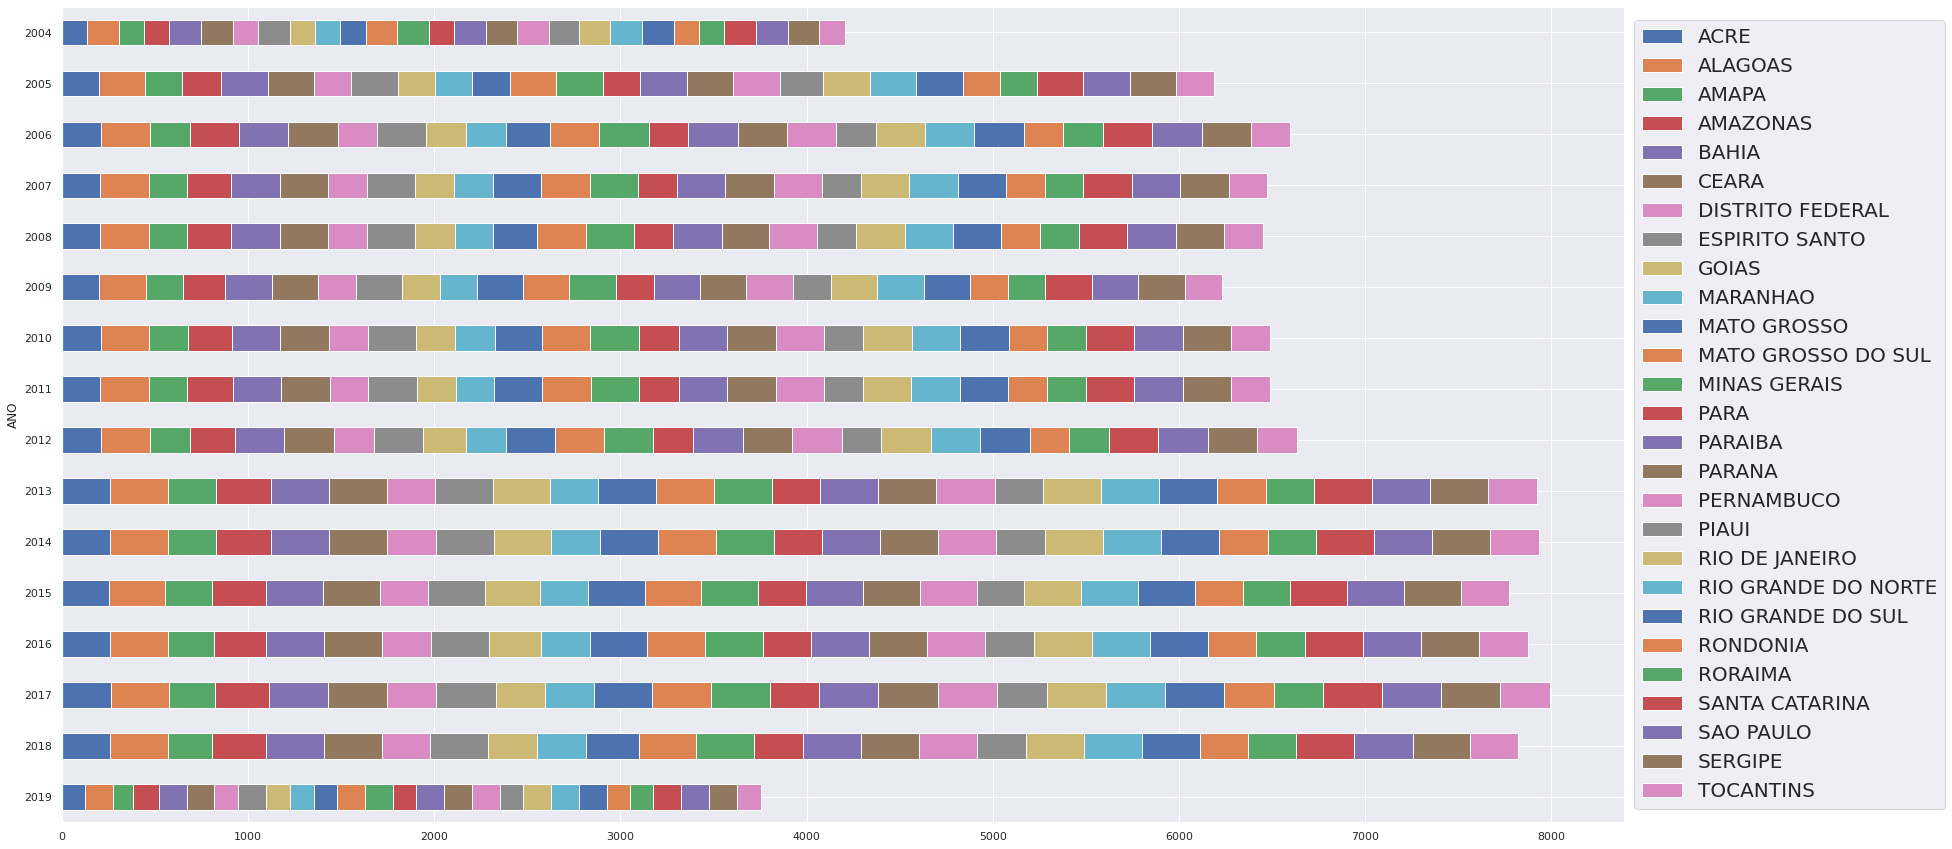

In [24]:
# Gráfico de Postos de Gasolina Analisados por Ano
postos_por_ano = df.groupby(["ANO", "ESTADO"])[["NÚMERO_DE_POSTOS_PESQUISADOS"]].count().reset_index()
fig, ax = plt.subplots(figsize=(28,15))
postos_por_ano.pivot("ANO", "ESTADO").sort_values(by="ANO", ascending=False).plot(kind="barh", stacked=True, ax=ax)
ax.legend(sorted(postos_por_ano.ESTADO.unique().tolist()), loc='center left', 
          bbox_to_anchor=(1, 0.5), prop={'size': 20});

#####PREÇO MÉDIO DE REVENDA

In [25]:
df.PREÇO_MÉDIO_REVENDA.describe()

count    106823.000000
mean         10.870780
std          17.752533
min           0.766000
25%           2.072000
50%           2.718000
75%           3.752000
max          99.357000
Name: PREÇO_MÉDIO_REVENDA, dtype: float64

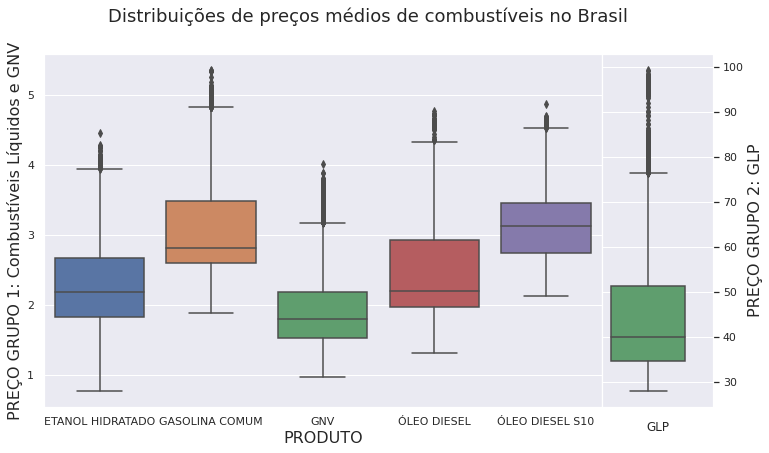

In [26]:
# Criando um boxplot de dois eixos separados com escalas diferentes
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,6.5), gridspec_kw={"width_ratios":[5,1], "wspace":0})

# Eixo para produtos com médias semelhantes
sns.boxplot(x="PRODUTO", y="PREÇO_MÉDIO_REVENDA", data=df[df.PRODUTO!="GLP"], order=["ETANOL HIDRATADO", "GASOLINA COMUM", 
                                                              "GNV", "ÓLEO DIESEL", "ÓLEO DIESEL S10"], 
            ax=ax[0])

# Eixo para GLP
sns.boxplot(x="PRODUTO", y="PREÇO_MÉDIO_REVENDA", data=df[df.PRODUTO=="GLP"], ax=ax[1], color='g', width=4)

plt.suptitle("Distribuições de preços médios de combustíveis no Brasil", fontsize=18)

# Formato GLP plot
ax[1].yaxis.tick_right()
ax[1].yaxis.set_label_position("right")
ax[0].set_xlabel('PRODUTO', fontsize=16)
ax[1].set_xlabel('GLP')
ax[0].set_ylabel('PREÇO GRUPO 1: Combustíveis Líquidos e GNV', fontsize=16)
ax[1].set_ylabel('PREÇO GRUPO 2: GLP', fontsize=16)
ax[1].set(xticklabels=[]);

Vamos analisar como essa distribuição se dá ao longo do tempo.

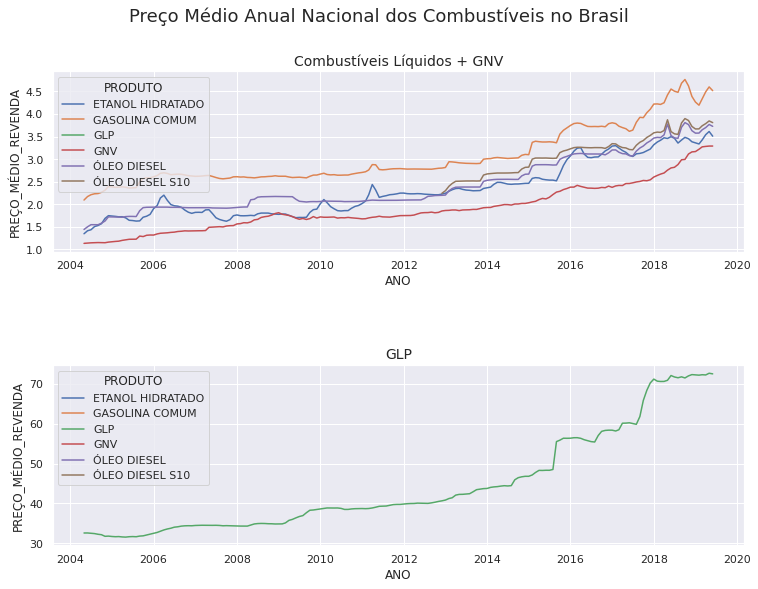

In [27]:
# Traçando o preço médio anual
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(12,9))

# Traçado de combustíveis não incluindo GLP
sns.lineplot(x="ANO_MÊS", y="PREÇO_MÉDIO_REVENDA", data=df[df.PRODUTO!="GLP"], hue="PRODUTO", ax=ax[0], err_style=None)
ax[0].set_xlabel("ANO")
ax[0].set_title("Combustíveis Líquidos + GNV", fontsize=14)

# Plot do LPG
sns.lineplot(x="ANO_MÊS", y="PREÇO_MÉDIO_REVENDA", data=df[df.PRODUTO == "GLP"], hue="PRODUTO", ax=ax[1], err_style=None)
ax[1].set_xlabel("ANO")
ax[1].set_title("GLP", fontsize=14)

plt.suptitle("Preço Médio Anual Nacional dos Combustíveis no Brasil", fontsize=18)
plt.tight_layout(pad=5)
plt.show()

#####PREÇO MÉDIO DE DISTRIBUIÇÃO

In [28]:
df.PREÇO_MÉDIO_DIST.describe()

count    106823.000000
mean          8.285580
std          13.469061
min           0.000000
25%           1.745000
50%           2.303000
75%           3.265000
max          83.137000
Name: PREÇO_MÉDIO_DIST, dtype: float64

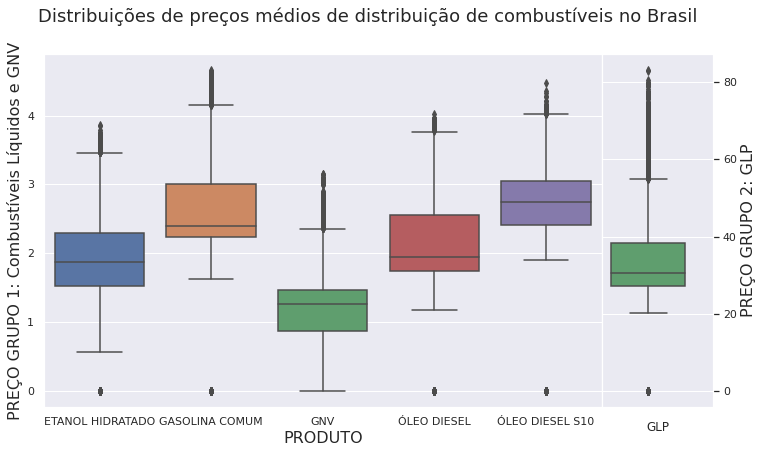

In [29]:
# Criando um boxplot de dois eixos separados com escalas diferentes
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,6.5), gridspec_kw={"width_ratios":[5,1], "wspace":0})

# Eixo para produtos com médias semelhantes
sns.boxplot(x="PRODUTO", y="PREÇO_MÉDIO_DIST", data=df[df.PRODUTO!="GLP"], order=["ETANOL HIDRATADO", "GASOLINA COMUM", 
                                                              "GNV", "ÓLEO DIESEL", "ÓLEO DIESEL S10"], 
            ax=ax[0])

# Eixo para GLP
sns.boxplot(x="PRODUTO", y="PREÇO_MÉDIO_DIST", data=df[df.PRODUTO=="GLP"], ax=ax[1], color='g', width=4)

plt.suptitle("Distribuições de preços médios de distribuição de combustíveis no Brasil", fontsize=18)

# Formato GLP plot
ax[1].yaxis.tick_right()
ax[1].yaxis.set_label_position("right")
ax[0].set_xlabel('PRODUTO', fontsize=16)
ax[1].set_xlabel('GLP')
ax[0].set_ylabel('PREÇO GRUPO 1: Combustíveis Líquidos e GNV', fontsize=16)
ax[1].set_ylabel('PREÇO GRUPO 2: GLP', fontsize=16)
ax[1].set(xticklabels=[]);

Novamente, vamos analisar como essa distribuição se dá ao longo do tempo.

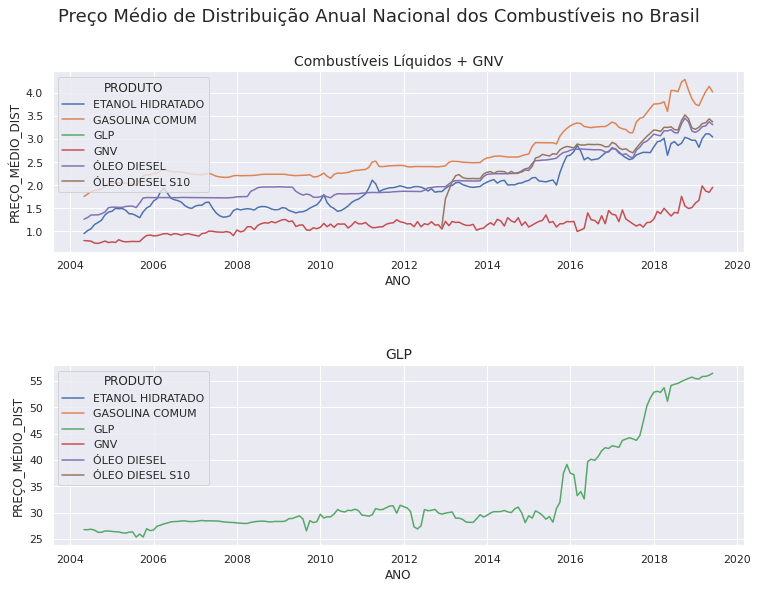

In [30]:
# Traçando o preço médio de distribuição anual
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(12,9))

# Traçado de combustíveis não incluindo GLP
sns.lineplot(x="ANO_MÊS", y="PREÇO_MÉDIO_DIST", data=df[df.PRODUTO!="GLP"], hue="PRODUTO", ax=ax[0], err_style=None)
ax[0].set_xlabel("ANO")
ax[0].set_title("Combustíveis Líquidos + GNV", fontsize=14)

# Plot do GLP
sns.lineplot(x="ANO_MÊS", y="PREÇO_MÉDIO_DIST", data=df[df.PRODUTO == "GLP"], hue="PRODUTO", ax=ax[1], err_style=None)
ax[1].set_xlabel("ANO")
ax[1].set_title("GLP", fontsize=14)

plt.suptitle("Preço Médio de Distribuição Anual Nacional dos Combustíveis no Brasil", fontsize=18)
plt.tight_layout(pad=5)
plt.show()

###Questionamentos

Analisadas estas variáveis e visualizadas suas respesctivas distribuições, alguns questionamentos podem ser levantados, entre eles:

*   Como a mudança do preço se comporta nas diferentes regiões do Brasil?
*   Dentro de uma região, quais Estados aumentaram mais seus preços?
*   Quais Estados são os mais baratos (ou mais caros) para diferentes tipos de combustíveis?





Deste modo, em finalização à análise exploratória, vamos agora responder estas perguntas indo ao encontro do nosso objetivo neste projeto, isto é, **vamos iniciar a análise geoespacial dos dados!**

##Análise Geoespacial

Para isso, vamos começar introduzindo uma nova base de dados extraída do site do IBGE, de forma a termos as informações geoespacial e, assim, conseguirmos visualiza-las em um mapa.

###Dados Geográficos

In [31]:
# URL para moldar arquivos dos Estados brasileiros
url = "ftp://geoftp.ibge.gov.br/organizacao_do_territorio/malhas_territoriais/malhas_municipais/municipio_2016/Brasil/BR/br_unidades_da_federacao.zip"
brazil_geo = gpd.read_file(url)

In [32]:
# Corrigindo os nomes dos Estado para corresponder ao conjunto de dados principal
estados_dict = {"RONDÔNIA":"RONDONIA", "PARÁ":"PARA", "AMAPÁ":"AMAPA", "MARANHÃO":"MARANHAO",
             "PIAUÍ":"PIAUI", "CEARÁ":"CEARA", "PARAÍBA":"PARAIBA", "ESPÍRITO SANTO":"ESPIRITO SANTO",
             "SÃO PAULO":"SAO PAULO", "PARANÁ":"PARANA", "GOIÁS":"GOIAS", "ACRE":"ACRE",
             "AMAZONAS":"AMAZONAS", "RORAIMA":"RORAIMA", "TOCANTINS":"TOCANTINS", 
             "RIO GRANDE DO NORTE":"RIO GRANDE DO NORTE", "PERNAMBUCO":"PERNAMBUCO", 
             "ALAGOAS":"ALAGOAS", "SERGIPE":"SERGIPE", "BAHIA":"BAHIA", "MINAS GERAIS":"MINAS GERAIS",
             "RIO DE JANEIRO":"RIO DE JANEIRO", "SANTA CATARINA":"SANTA CATARINA", "MATO GROSSO DO SUL":"MATO GROSSO DO SUL", 
             "MATO GROSSO":"MATO GROSSO", "DISTRITO FEDERAL":"DISTRITO FEDERAL", "RIO GRANDE DO SUL":"RIO GRANDE DO SUL"}

brazil_geo["NM_ESTADO"] = brazil_geo.NM_ESTADO.map(estados_dict)
brazil_geo.crs = {"init": "epsg:4326"}
brazil_geo.columns = ['ESTADO', 'REGIÃO', 'CD_GEOCUF', 'geometry']
brazil_geo["REGIÃO"] = brazil_geo.REGIÃO.str.replace("-", " ")

/usr/local/lib/python3.6/dist-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


In [33]:
# Extraindo a geografia das regiões
brazil_geo_regiao = brazil_geo.dissolve(by='REGIÃO').reset_index()
brazil_geo_regiao = brazil_geo_regiao[['REGIÃO', 'geometry']]

In [34]:
df.columns

Index(['DATA_INICIAL', 'REGIÃO', 'ESTADO', 'PRODUTO', 'NÚMERO_DE_POSTOS_PESQUISADOS', 'UNIDADE_DE_MEDIDA', 'PREÇO_MÉDIO_REVENDA', 'PREÇO_MÉDIO_DIST', 'MÊS', 'ANO', 'GRUPO_PREÇO', 'PREÇO_NORM_MÉDIO', 'ANO_MÊS'], dtype='object')

In [35]:
# Mudança percentual nos dados de preços
regioes = df.REGIÃO.unique().tolist()
df_pct_mudança = pd.DataFrame()
count = 0

for i in range(len(regioes)):
    regiao = regioes[i]
    estados = df[df.REGIÃO==regiao]["ESTADO"].unique()
    
    for i in range(len(estados)):
        estado = estados[i]
        produtos = df[(df.REGIÃO==regiao) & (df.ESTADO==estado)]["PRODUTO"].unique()
       
        for i in range(len(produtos)):
            produto = produtos[i]
            anos = df[(df.REGIÃO==regiao) & (df.ESTADO==estado) & (df.PRODUTO==produto)]["ANO"].unique()
            
            preço_medio = df[(df.REGIÃO==regiao) & (df.ESTADO==estado) & 
                            (df.PRODUTO==produto)]["PREÇO_MÉDIO_REVENDA"].mean()
            
            # Alteração percentual para dados brutos
            primeiro_preço = df[(df.REGIÃO==regiao) & (df.ESTADO==estado) & 
                            (df.PRODUTO==produto) & (df.ANO==anos[0])]["PREÇO_MÉDIO_REVENDA"].iloc[0]
            ultimo_preço = df[(df.REGIÃO==regiao) & (df.ESTADO==estado) & 
                            (df.PRODUTO==produto) & (df.ANO==anos[-1])]["PREÇO_MÉDIO_REVENDA"].iloc[-1]
            preço_pct_mudança = (ultimo_preço - primeiro_preço) / np.abs(primeiro_preço)
        
        
            # Alteração percentual para dados normalizados
            primeiro_preço_norm = df[(df.REGIÃO==regiao) & (df.ESTADO==estado) & 
                            (df.PRODUTO==produto) & (df.ANO==anos[0])]["PREÇO_NORM_MÉDIO"].iloc[0]
            ultimo_preço_norm = df[(df.REGIÃO==regiao) & (df.ESTADO==estado) & 
                            (df.PRODUTO==produto) & (df.ANO==anos[-1])]["PREÇO_NORM_MÉDIO"].iloc[-1]
            preço_pct_mudança_norm = (ultimo_preço_norm - primeiro_preço_norm) / np.abs(primeiro_preço_norm)            
            
            # Adicionando ao dataframe
            df_temp = pd.DataFrame({"REGIÃO":regiao, "ESTADO":estado, 
                                    "PRODUTO":produto, 
                                    "PRIMEIRO_ANO":anos[0], "ULTIMO_ANO":anos[-1], "PREÇO_MEDIO_COMBUST":preço_medio,
                                    "PRIMEIRO_PREÇO":primeiro_preço, "ULTIMO_PREÇO":ultimo_preço, "PREÇO_PCT_MUDANÇA":preço_pct_mudança, 
                                    "PRIMEIRO_PREÇO_NORM":primeiro_preço_norm, "ULTIMO_PREÇO_NORM":ultimo_preço_norm, 
                                    "PREÇO_PCT_MUDANÇA_NORM":preço_pct_mudança_norm
                                   }, 
                                   index=[count])
            
            df_pct_mudança = df_pct_mudança.append(df_temp)
            
            count += 1

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:34: RuntimeWarning: divide by zero encountered in double_scalars


In [36]:
# Mesclando a variação percentual de preços com dados geográficos
df_pct_mudança_regiao = df_pct_mudança.groupby(['REGIÃO', 'PRODUTO']).mean().reset_index()

# Combinando novos conjuntos de dados com dados espaciais
brazil_geo = brazil_geo.drop('REGIÃO', axis=1).merge(df_pct_mudança, on='ESTADO')
brazil_geo_regiao = brazil_geo_regiao.merge(df_pct_mudança_regiao, on='REGIÃO')

# Corrigindo datatypes
for col in ['PRIMEIRO_ANO', 'ULTIMO_ANO']:
    brazil_geo_regiao[col] = brazil_geo_regiao[col].astype(int)


###Variação Percentual do Preço por Produto por Região

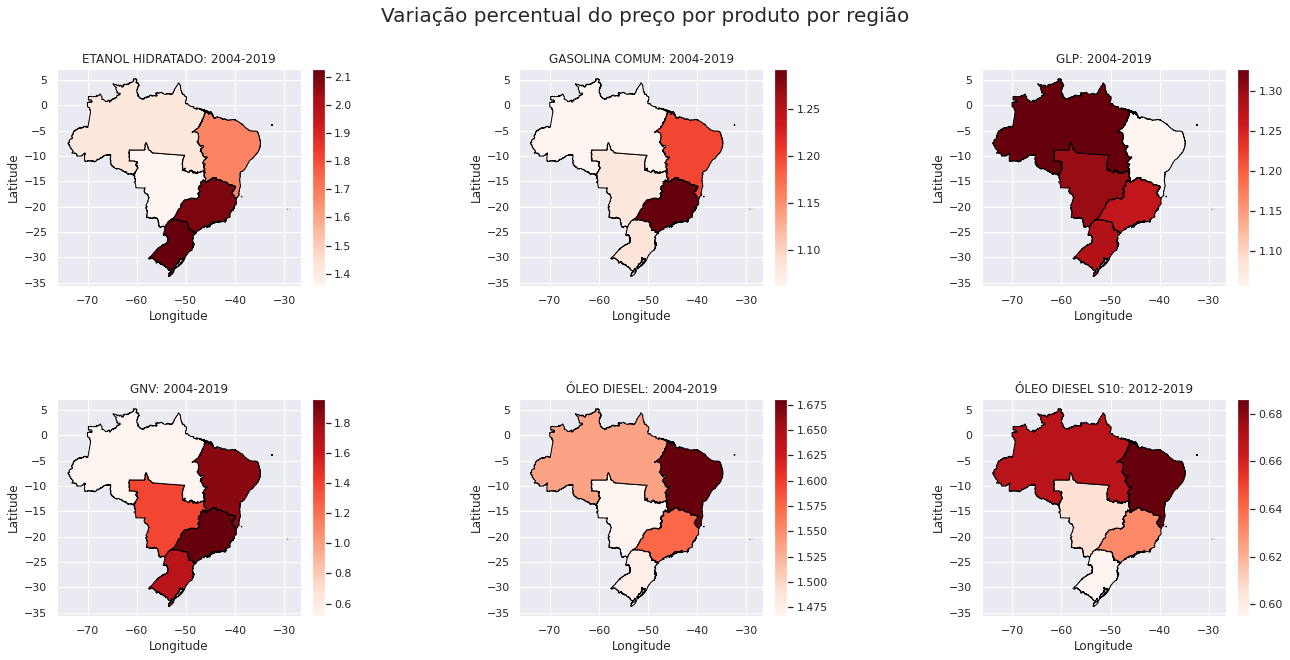

In [37]:
# Criando um gráfico com dados de preços brutos
nrows = 2
ncols = 3
produtos = df.PRODUTO.unique().tolist()

fig_raw, ax_raw = plt.subplots(figsize=(20,10), nrows=nrows, ncols=ncols)

n = 0

for row in range(nrows):
   
    for col in range(ncols):
        
        divider = make_axes_locatable(ax_raw[row,col])
        cax = divider.append_axes("right", size="5%", pad=0.1)
        brazil_geo_regiao[brazil_geo_regiao.PRODUTO==produtos[n]].plot(column="PREÇO_PCT_MUDANÇA", 
                                                                       legend=True, ax=ax_raw[row,col], cmap="Reds", 
                                                                       cax=cax, edgecolor='black')
        
        # Plotando títulos
        ano_range = brazil_geo_regiao[brazil_geo_regiao.PRODUTO==produtos[n]][["PRIMEIRO_ANO", "ULTIMO_ANO"]]
        ano_range = [ano_range["PRIMEIRO_ANO"].min(), ano_range["ULTIMO_ANO"].max()]
        ano_range = str(ano_range[0]) + "-" + str(ano_range[1])
        
        ax_raw[row,col].set_title(produtos[n] + ": " + ano_range)
        ax_raw[row,col].set_xlabel("Longitude")
        ax_raw[row,col].set_ylabel("Latitude")
        n += 1

fig_raw.suptitle("Variação percentual do preço por produto por região", fontsize=20)
plt.tight_layout(pad=5)
plt.show()

###Variação Percentual do Preço por Estado

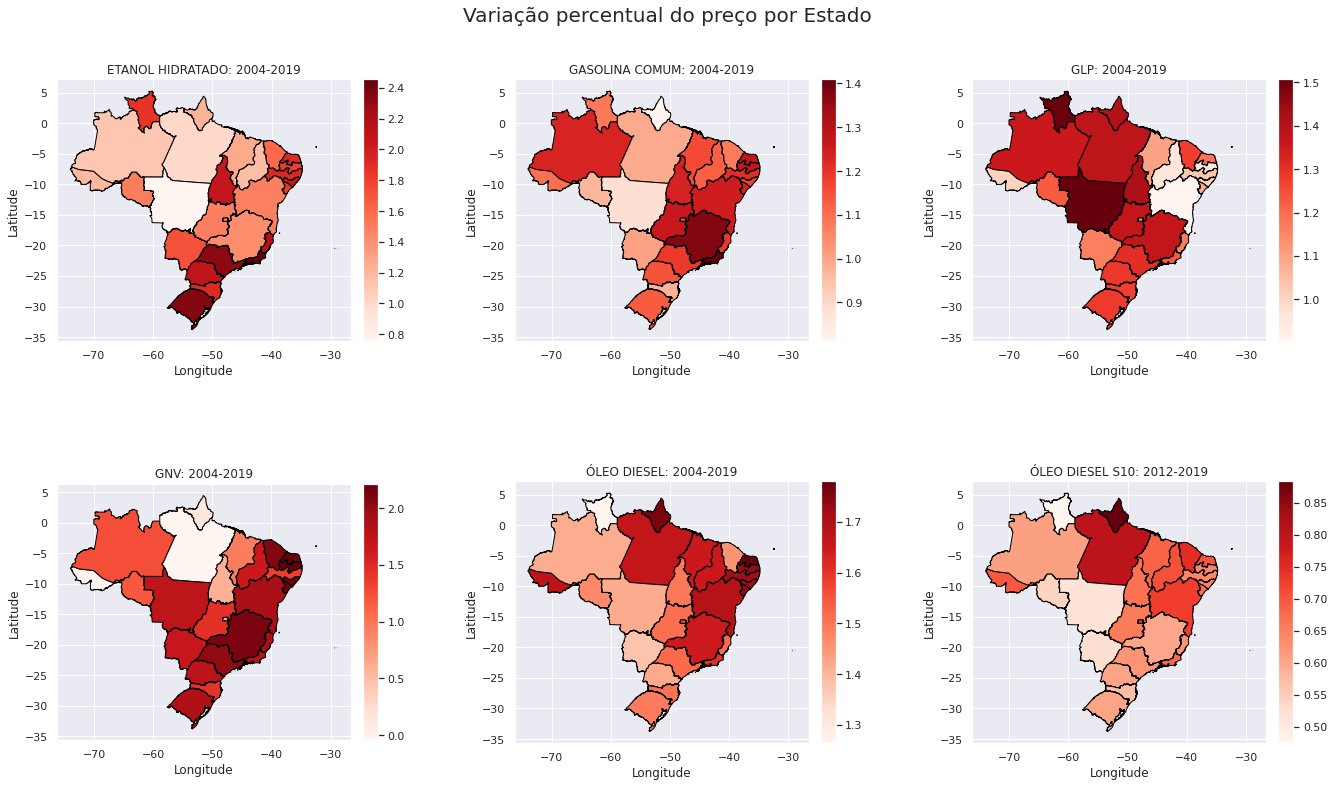

In [38]:
# Criando um gráfico com dados de preços brutos
nrows = 2
ncols = 3
produtos = df.PRODUTO.unique().tolist()
fig_raw, ax_raw = plt.subplots(figsize=(20,12), nrows=nrows, ncols=ncols)
n = 0

for row in range(nrows):
   
    for col in range(ncols):
        
        divider = make_axes_locatable(ax_raw[row,col])
        cax = divider.append_axes("right", size="5%", pad=0.1)
        brazil_geo[brazil_geo.PRODUTO==produtos[n]].plot(column="PREÇO_PCT_MUDANÇA", 
                                                                       legend=True, ax=ax_raw[row,col], cmap="Reds", 
                                                                       cax=cax, edgecolor='black')
        
        # Plot titles
        ano_range = brazil_geo[brazil_geo.PRODUTO==produtos[n]][["PRIMEIRO_ANO", "ULTIMO_ANO"]]
        ano_range = [ano_range["PRIMEIRO_ANO"].min(), ano_range["ULTIMO_ANO"].max()]
        ano_range = str(ano_range[0]) + "-" + str(ano_range[1])
        
        ax_raw[row,col].set_title(produtos[n] + ": " + ano_range)
        ax_raw[row,col].set_xlabel("Longitude")
        ax_raw[row,col].set_ylabel("Latitude")
        n += 1

fig_raw.suptitle("Variação percentual do preço por Estado", fontsize=20)
plt.tight_layout(pad=5)
plt.show()

###Preço Médio dos Combustíveis por Estado

In [39]:
# Comparação do preço médio dos combustíveis por estado
brazil_combust_estado = brazil_geo.groupby(["ESTADO", "PRODUTO"])["PREÇO_MEDIO_COMBUST"].mean().reset_index()

# Reunir com dados espaciais
brazil_combust_estado_geo = brazil_geo.merge(brazil_combust_estado.drop(['PRODUTO','PREÇO_MEDIO_COMBUST'], axis=1) , on="ESTADO")

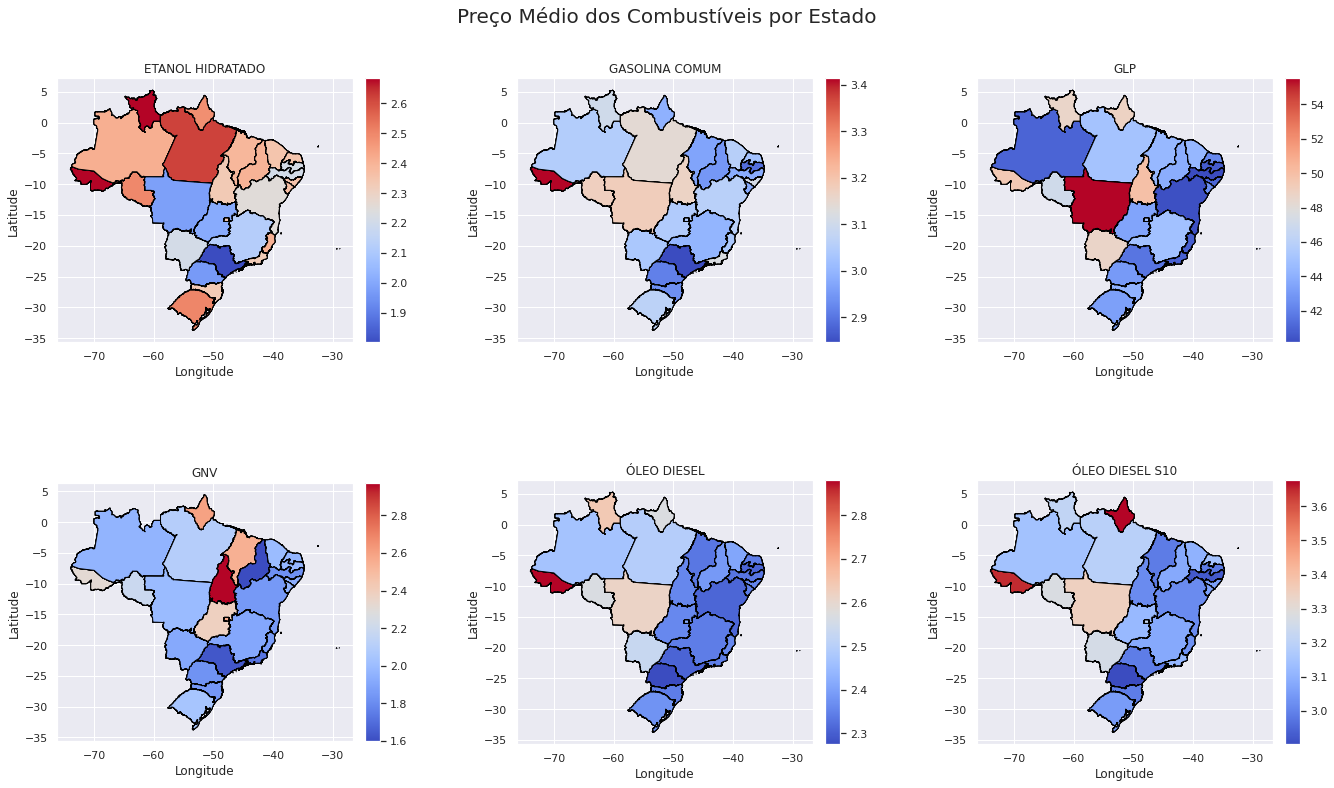

In [40]:
# Definindo a quantidade de linhas e colunas
nrows = 2
ncols = 3
produtos = df.PRODUTO.unique()
fig, ax = plt.subplots(figsize=(20,12), nrows=nrows, ncols=ncols)
n = 0

# Iterar através de eixos de figura
for row in range(nrows):
   
    for col in range(ncols):
        
        # Ajustando a localização e o tamanho da legenda
        divider = make_axes_locatable(ax[row,col]) 
        cax = divider.append_axes("right", size="5%", pad=0.1)
        
        # Plotando em coropleth
        brazil_combust_estado_geo[brazil_combust_estado_geo.PRODUTO==produtos[n]].plot(column="PREÇO_MEDIO_COMBUST", 
                                                                       cmap="coolwarm", 
                                                                       legend=True, ax=ax[row,col], 
                                                                       cax=cax, edgecolor='black')
        
        # Set title and labels
        ax[row,col].set_title(produtos[n])
        ax[row,col].set_xlabel("Longitude")
        ax[row,col].set_ylabel("Latitude")
        
        n += 1

fig.suptitle("Preço Médio dos Combustíveis por Estado", fontsize=20)
plt.tight_layout(pad=5)
plt.show()

Mas, para melhor visualização, podemos ir além e definir quais os estados com maiores e menores preços de combustíveis.

In [41]:
estados = brazil_combust_estado.ESTADO.unique().tolist()

# Criando um dataframe dos combustíveis mais baratos por Estado
combust_mais_baratos = pd.DataFrame()

# Iterando por meio de objetos group-by e extraindo o mínimo: extreme_of_group (dados, coluna, extremo)
for i in range(len(estados)):

    estado_grupo = brazil_combust_estado_geo.groupby("ESTADO").get_group(estados[i])
    estado_grupo = estado_grupo[estado_grupo.PREÇO_MEDIO_COMBUST == estado_grupo.PREÇO_MEDIO_COMBUST.min()]
    combust_mais_baratos = combust_mais_baratos.append(estado_grupo)
    combust_mais_baratos.rename({"PREÇO_MEDIO_COMBUST":"PREÇO_MIN_COMBUST"}, inplace=True)
    
# Criando um dataframe dos combustíveis mais caros por Estado
combust_mais_caros = pd.DataFrame()

# Removendo o GLP da lista de produtos
brazil_combust_estado_geo_sem_GLP = brazil_combust_estado_geo[brazil_combust_estado_geo.PRODUTO!="GLP"]

# Iterando por meio de objetos group-by e extraindo o máximo: extreme_of_group (dados, coluna, extremo)
for i in range(len(estados)):

    estado_grupo = brazil_combust_estado_geo_sem_GLP.groupby("ESTADO").get_group(estados[i])
    estado_grupo = estado_grupo[estado_grupo.PREÇO_MEDIO_COMBUST == estado_grupo.PREÇO_MEDIO_COMBUST.max()]
    combust_mais_caros = combust_mais_caros.append(estado_grupo)
    combust_mais_caros.rename({"PREÇO_MEDIO_COMBUST":"PREÇO_MAX_COMBUST"}, inplace=True)

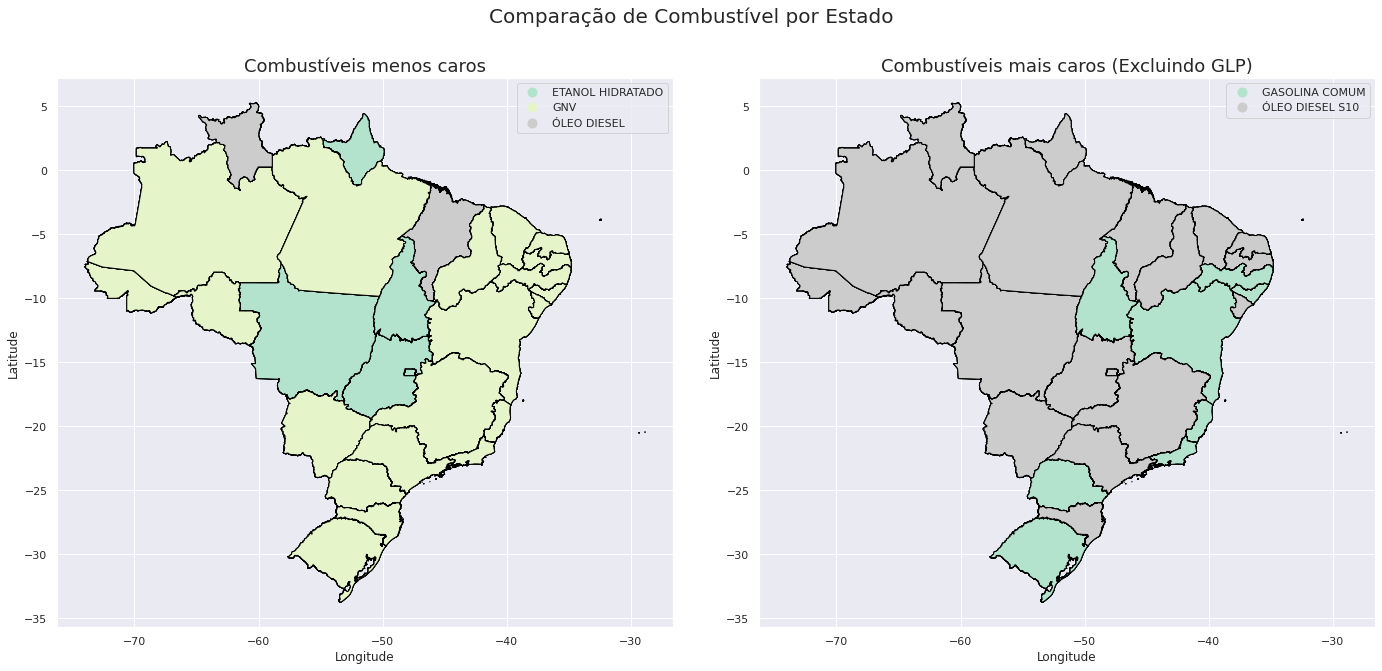

In [42]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,10))

# Choropleths dos combustíveis mais baratos e mais caros
combust_mais_caros.plot(column="PRODUTO", cmap="Pastel2", legend=True, ax=ax[1], edgecolor='black')
combust_mais_baratos.plot(column="PRODUTO", cmap="Pastel2", legend=True, ax=ax[0], edgecolor='black')

# Formatando a figura e eixos
ax[0].set_title("Combustíveis menos caros", fontsize=18)
ax[1].set_title("Combustíveis mais caros (Excluindo GLP)", fontsize=18)
ax[0].set_ylabel("Latitude")
ax[0].set_xlabel("Longitude")
ax[1].set_ylabel("Latitude")
ax[1].set_xlabel("Longitude")

plt.suptitle("Comparação de Combustível por Estado", fontsize=20)
plt.tight_layout(pad=3)
plt.show()

## Conclusão

Primeiramente, o mérito de conclusão deste projeto se deve integralmente ao Gregory (@gclindsey), bem como de soluções de diversos usuários do site [Stackoverflow](https://stackoverflow.com/), sem a ajuda e guia destes, provavelmente, este projeto demoraria mais do que o necessário.

Posto isto, ao longo da análise buscou-se evidenciar o máximo possível a visualização dos dados e a busca por resultados relevantes. Toda preparação inicial dos dados, apesar de extensa, foi imprescindível para a visualização geoespacial.

Como conclusões superficiais, podemos extrair que:

*   A maioria das informações se dá na região Nordeste, isso ocorre pela maior quantidade de Estados englobados por esta região;
*   A maior quantidade de itens presentes no Norte e Nordeste do país também segue a mesma lógica exposta anteriormente, contudo, também é válido observar que tais regiões são responsáveis pela produção e extração da maior parte da materia-prima usada para a fabricação dos combustiveis. Por isso, faz sentido que estas regiões apresentem a maioria dos itens quando analisada a sua distribuição.
*   A quantidade de tipos de combustível se mostra proporcional, cabendo observar apenas que o controle das informações do Óleo Diesel S10 só começou a ser disponibilizada a partir de 2012.
*   Os Estados mais afastados ao Norte do país, como o Acre, carecem de distribuição, todavia. Existem muitas explicações, mas, acredito que, a principal seja a precariedade de infraestrutura de transporte na área.
*   É válido observar que a distribuição de Gasolina está diretamente relacionada com o desenvolvilmento de grandes centros urbanos, por isso podemos tomar esse fator como um indice de urbanização.
*   A critério de observação, é interessante ver como houve uma retração da quantidade de postos pesquisados em 2019. Isso muito se deve às novas politicas de distribuição de combustível implantadas no mesmo ano, no que se relaciona à legalidade do tabelamento do frete, com o fim do subsídio ao diesel.
*   Ao analisarmos a linha temporal da variação do preço médio de combustiveis, tanto para revenda quanto para distribuição, pode-se perceber que os anos de 2015 e 2016 foram decisivos para o seus respectivos aumentos. Quem não se lembra do aumento sobre a tributação sobre os combustíveis, que culminou em partes na greve dos caminhoneiros em 2018?

Bem, essas foram apenas algumas conclusões superficiais, mas ainda há muito do que se pode extrair desta análise, cabendo ao leitor observar quais relações ele procura.





